In [185]:
import bs4 as BeautifulSoup
import requests
import datetime
import smtplib

In [186]:
url = "user-agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.64 Safari/537.36 Edg/101.0.1210.47"


In [187]:
header = "https://httpbin.org/headers"

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [189]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [190]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [191]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [192]:
# Get the title
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [193]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [194]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com">Huber Timing Home</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-user"></i> 5K Individual</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 5K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/team/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i aria-hidden="true" class="fa fa-users"></i> 10K Team</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px"><i class="fa fa-stream"></i> Summary</a>,
 <a id="individual" name="individual"></a>,
 <a data-url="/results/2017GPTR10K" href="#tabs-1" id="rootTab" style="font-size: 18px">10K Results</a>,
 <a href="https://www.hubertiming.com/"><img

In [195]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [196]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2">
<b>10K:</b>
</tr>, <tr>
<td>Finishers:</td>
<td>577</td>
</tr>, <tr>
<td>Male:</td>
<td>414</td>
</tr>, <tr>
<td>Female:</td>
<td>163</td>
</tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr data-bib="814">
<td>1</td>
<td>814</td>
<td>

                    JARED WILSON

                </td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>36:24</td>
<td></td>
</tr>, <tr data-bib="573">
<td>2</td>
<td>573</td>
<td>

                    NATHAN A SUSTERSIC

                </td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>36:45</td>
<td>
<img class="lazy teamThumbs" data-src="/teamLogoThumbnail/logo?teamName=INTEL%20TEAM%20F&amp;raceId=1251&amp;state=OR"/>
                            INTEL TEAM F
                        </td>
</tr>, <tr data-bib="687">
<td>3</td>
<td>687</td>
<td>

                    FRANCISCO MAYA

      

In [197]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>1:42:10</td>, <td></td>]


bs4.element.ResultSet

In [198]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


In [199]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 1:42:10, ]


str

In [200]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, \r\n\r\n JARED WIL..."
6,"[2, 573, \r\n\r\n NATHAN A ..."
7,"[3, 687, \r\n\r\n FRANCISCO..."
8,"[4, 623, \r\n\r\n PAUL MORR..."
9,"[5, 569, \r\n\r\n DEREK G O..."


In [201]:
type(df[0])

pandas.core.series.Series

In [202]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)
df1

,0,1,2,3,4,5,6,7,8
0,[],None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
577,[573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:17,1:38:34,]
578,[574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:38:31,1:40:32,\n\r\n INTEL TEAM ...
579,[575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:38:32,1:40:34,]
580,[576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:40:47,1:42:01,]


In [203]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [204]:
col_labels = soup.find_all('th')

In [205]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Gun Time, Team]']


In [206]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [207]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]


In [208]:
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]


In [209]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
0,],None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None


In [210]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Gun Time   578 non-null    object
 8    Team]      578 non-null    object
dtypes: object(9)
memory usage: 45.5+ KB


(583, 9)

In [211]:
df6 = df5.dropna(axis=0, how='any')

In [212]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team]
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [213]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [214]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,39:24,\n\r\n INTEL TEAM ...


In [215]:
cols = df7.columns
print(cols)

Index(['Place', ' Bib', ' Name', ' Gender', ' City', ' State', ' Chip Time',
       ' Gun Time', 'Team'],
      dtype='object')


In [216]:
ChipTime = df7.iloc[:,6]
ChipTime

5         36:21
6         36:42
7         37:44
8         38:34
9         39:21
         ...   
577     1:38:17
578     1:38:31
579     1:38:32
580     1:40:47
581     1:41:18
Name:  Chip Time, Length: 577, dtype: object

df77 = df7.rename(columns = {"Chip Time":'ChipTime'}, inplace = True)
df77.head()

df7.City.value_counts()

time_list = ChipTime.tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

df7['Runner_mins'] = time_mins
df7.head()

df7.describe(include=[np.number])

In [217]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [218]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Place                   Bib                    Name         ...  \
        count unique top freq count unique   top freq count unique  ...   
 Gender                                                             ...   
 F        163    163  30    1   163    163   253    1   163    163  ...   
 M        414    414   1    1   414    414   814    1   414    413  ...   

         Chip Time       Gun Time                        Team                  
               top freq     count unique       top freq count unique top freq  
 Gender                                                                        
 F         1:03:34    2       163    155   1:13:04    2   163     12      141  
 M           55:00    5       414    378     55:43    3   414     21      356  

[2 rows x 32 columns]


df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

In [219]:
#PROJECT 2

In [220]:
url = "https://en.wikipedia.org/wiki/List_of_African_countries_by_GDP_(nominal)"
html = urlopen(url)

In [221]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [222]:
# Get the title
title = soup.title
print(title)

<title>List of African countries by GDP (nominal) - Wikipedia</title>


In [223]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [224]:
soup.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a href="/wiki/Gross_domestic_product" title="Gross domestic product">Gross domestic product</a>,
 <a href="/wiki/Market_value" title="Market value">market value</a>,
 <a href="/wiki/Africa" title="Africa">Africa</a>,
 <a href="/wiki/International_Monetary_Fund" title="International Monetary Fund">International Monetary Fund</a>,
 <a href="/wiki/Cost_of_living" title="Cost of living">cost of living</a>,
 <a href="/wiki/Exchange_rate" title="Exchange rate">exchange rates</a>,
 <a href="/wiki/Currency" title="Currency">currency</a>,
 <a href="#cite_note-1">[1]</a>,
 <a href="#cite_note-2">[2]</a>,
 <a href="#cite_note-3">[3]</a>,
 <a href="#cite_note-4">[4]</a>,
 <a class="mw-redirect" href="/wiki/National_wealth" title="National wealth">national wealth</a>,
 <a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">purchasing

In [225]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

None
#mw-head
#searchInput
/wiki/Gross_domestic_product
/wiki/Market_value
/wiki/Africa
/wiki/International_Monetary_Fund
/wiki/Cost_of_living
/wiki/Exchange_rate
/wiki/Currency
#cite_note-1
#cite_note-2
#cite_note-3
#cite_note-4
/wiki/National_wealth
/wiki/Purchasing_power_parity
/wiki/International_trade
#cite_note-5
#cite_note-6
/wiki/File:Africa_GDP_Map_2020_including_Somaliland.svg
/wiki/File:Africa_GDP_Map_2020_including_Somaliland.svg
/wiki/File:Map_of_Africa_by_2020_nominal_GDP_per_capita_(USD).svg
/wiki/File:Map_of_Africa_by_2020_nominal_GDP_per_capita_(USD).svg
#cite_note-IMF_OCTOBER_2022-7
/wiki/Nigeria
/wiki/Egypt
/wiki/South_Africa
/wiki/Algeria
/wiki/Morocco
/wiki/Angola
/wiki/Kenya
/wiki/Ethiopia
/wiki/Tanzania
/wiki/Ghana
/wiki/List_of_countries_by_GDP_(nominal)
#cite_note-imf_data_ssa-8
#cite_note-imf_data_na-9
/wiki/List_of_countries_by_GDP_(nominal)_per_capita
#cite_note-imf_data_ssa-8
#cite_note-imf_data_na-9
/wiki/Nigeria
/wiki/Egypt
/wiki/South_Africa
/wiki/Algeri

In [226]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr>
<th>Rank
</th>
<th>Country
</th>
<th><a href="/wiki/List_of_countries_by_GDP_(nominal)" title="List of countries by GDP (nominal)">Nominal GDP</a><br/>(Billion US$)<sup class="reference" id="cite_ref-imf_data_ssa_8-0"><a href="#cite_note-imf_data_ssa-8">[8]</a></sup><sup class="reference" id="cite_ref-imf_data_na_9-0"><a href="#cite_note-imf_data_na-9">[9]</a></sup>
</th>
<th><a href="/wiki/List_of_countries_by_GDP_(nominal)_per_capita" title="List of countries by GDP (nominal) per capita">Per Capita</a><br/>(US$)<sup class="reference" id="cite_ref-imf_data_ssa_8-1"><a href="#cite_note-imf_data_ssa-8">[8]</a></sup><sup class="reference" id="cite_ref-imf_data_na_9-1"><a href="#cite_note-imf_data_na-9">[9]</a></sup>
</th></tr>, <tr>
<td align="center">1
</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/23

In [227]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="navbox-abovebelow hlist" colspan="2"><div>
<ul><li><a href="/wiki/Template:Finance_country_lists" title="Template:Finance country lists">Lists of countries by financial rankings</a></li></ul>
<div class="hlist" style="text-align:center">
<ul><li><a href="/wiki/List_of_international_rankings" title="List of international rankings">List of international rankings</a></li>
<li><a href="/wiki/Lists_by_country" title="Lists by country">Lists by country</a></li></ul>
</div>
</div></td>]


bs4.element.ResultSet

In [228]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[
Lists of countries by financial rankings

List of international rankings
Lists by country

]


In [229]:
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[
Lists of countries by financial rankings

List of international rankings
Lists by country

]


str

In [230]:
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[1\n, Nigeria\n, 504.203\n, 2,326.230\n]"
2,"[2\n, Egypt\n, 469.094\n, 4,504.369\n]"
3,"[3\n, South Africa\n, 411.480\n, 6,738.926\n]"
4,"[4\n, Algeria\n, 187.155\n, 4,151.437\n]"
5,"[5\n, Morocco\n, 142.874\n, 3,896.214\n]"
6,"[6\n, Angola\n, 124.794\n, 3,790.704\n]"
7,"[7\n, Kenya\n, 114.858\n, 2,255.480\n]"
8,"[8\n, Ethiopia\n, 111.181\n, 1,097.584\n]"
9,"[9\n, Tanzania\n, 76.582\n, 1,245.040\n]"


In [231]:
df.to_csv(r"C:\Users\kelvin\OneDrive\Desktop\imported _data\data_split1.csv")

In [232]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5
0,[],None,None,None,None,None
1,[1\n,Nigeria\n,504.203\n,2,326.230\n],None
2,[2\n,Egypt\n,469.094\n,4,504.369\n],None
3,[3\n,South Africa\n,411.480\n,6,738.926\n],None
4,[4\n,Algeria\n,187.155\n,4,151.437\n],None
5,[5\n,Morocco\n,142.874\n,3,896.214\n],None
6,[6\n,Angola\n,124.794\n,3,790.704\n],None
7,[7\n,Kenya\n,114.858\n,2,255.480\n],None
8,[8\n,Ethiopia\n,111.181\n,1,097.584\n],None
9,[9\n,Tanzania\n,76.582\n,1,245.040\n],None


In [ ]:
# df2 = df1.iloc[0:55,:5]

In [276]:
df1 = df1.iloc[0:55,1:5]
df1.head(83)

,Ranking,PCI
1,2,326.230
2,4,504.369
3,6,738.926
4,4,151.437
5,3,896.214
6,3,790.704
7,2,255.480
8,1,097.584
9,1,245.040
10,2,368.814


In [234]:
df1= df1.rename(columns={1: 'Country', 2: 'GDP',3:"Ranking",4:"PCI"})
df1

,Country,GDP,Ranking,PCI
0,None,None,None,None
1,Nigeria\n,504.203\n,2,326.230\n]
2,Egypt\n,469.094\n,4,504.369\n]
3,South Africa\n,411.480\n,6,738.926\n]
4,Algeria\n,187.155\n,4,151.437\n]
...,...,...,...,...
78,None,None,None,None
79,None,None,None,None
80,None,None,None,None
81,None,None,None,None


In [277]:
df1 = df1.dropna(axis=0, how='any')
df1.shape
df1

,Ranking,PCI
1,2,326.230
2,4,504.369
3,6,738.926
4,4,151.437
5,3,896.214
6,3,790.704
7,2,255.480
8,1,097.584
9,1,245.040
10,2,368.814


In [236]:
df1 = df1.dropna(axis=1, how='any')
df1.shape
df1

,Country,GDP,Ranking,PCI
1,Nigeria\n,504.203\n,2,326.230\n]
2,Egypt\n,469.094\n,4,504.369\n]
3,South Africa\n,411.480\n,6,738.926\n]
4,Algeria\n,187.155\n,4,151.437\n]
5,Morocco\n,142.874\n,3,896.214\n]
6,Angola\n,124.794\n,3,790.704\n]
7,Kenya\n,114.858\n,2,255.480\n]
8,Ethiopia\n,111.181\n,1,097.584\n]
9,Tanzania\n,76.582\n,1,245.040\n]
10,Ghana\n,75.996\n,2,368.814\n]


In [237]:
cols = ['Country', 'GDP', 'Ranking','PCI']
df1[cols] = df1[cols].apply(lambda x: x.str.strip("\n"))
df.shape

(83, 1)

In [238]:
df1["Ranking"] = df1["Ranking"].str.strip("\n]")
df1["PCI"] = df1["PCI"].str.strip("\n]")

In [239]:
df2 = df1.iloc[0:54,:]
df2

,Country,GDP,Ranking,PCI
1,Nigeria,504.203,2,326.230
2,Egypt,469.094,4,504.369
3,South Africa,411.480,6,738.926
4,Algeria,187.155,4,151.437
5,Morocco,142.874,3,896.214
6,Angola,124.794,3,790.704
7,Kenya,114.858,2,255.480
8,Ethiopia,111.181,1,097.584
9,Tanzania,76.582,1,245.040
10,Ghana,75.996,2,368.814


In [240]:
df2["PCI"] = df2['Ranking']+ "" + df2['PCI']
df2

,Country,GDP,Ranking,PCI
1,Nigeria,504.203,2,2326.230
2,Egypt,469.094,4,4504.369
3,South Africa,411.480,6,6738.926
4,Algeria,187.155,4,4151.437
5,Morocco,142.874,3,3896.214
6,Angola,124.794,3,3790.704
7,Kenya,114.858,2,2255.480
8,Ethiopia,111.181,1,1097.584
9,Tanzania,76.582,1,1245.040
10,Ghana,75.996,2,2368.814


In [241]:
df2.drop(columns ="Ranking", inplace = True)
df2

,Country,GDP,PCI
1,Nigeria,504.203,2326.230
2,Egypt,469.094,4504.369
3,South Africa,411.480,6738.926
4,Algeria,187.155,4151.437
5,Morocco,142.874,3896.214
6,Angola,124.794,3790.704
7,Kenya,114.858,2255.480
8,Ethiopia,111.181,1097.584
9,Tanzania,76.582,1245.040
10,Ghana,75.996,2368.814


In [242]:
df_3 = df2.iloc[0:34,:]
df_3

,Country,GDP,PCI
1,Nigeria,504.203,2326.230
2,Egypt,469.094,4504.369
3,South Africa,411.480,6738.926
4,Algeria,187.155,4151.437
5,Morocco,142.874,3896.214
6,Angola,124.794,3790.704
7,Kenya,114.858,2255.480
8,Ethiopia,111.181,1097.584
9,Tanzania,76.582,1245.040
10,Ghana,75.996,2368.814


In [243]:
df_3

,Country,GDP,PCI
1,Nigeria,504.203,2326.230
2,Egypt,469.094,4504.369
3,South Africa,411.480,6738.926
4,Algeria,187.155,4151.437
5,Morocco,142.874,3896.214
6,Angola,124.794,3790.704
7,Kenya,114.858,2255.480
8,Ethiopia,111.181,1097.584
9,Tanzania,76.582,1245.040
10,Ghana,75.996,2368.814


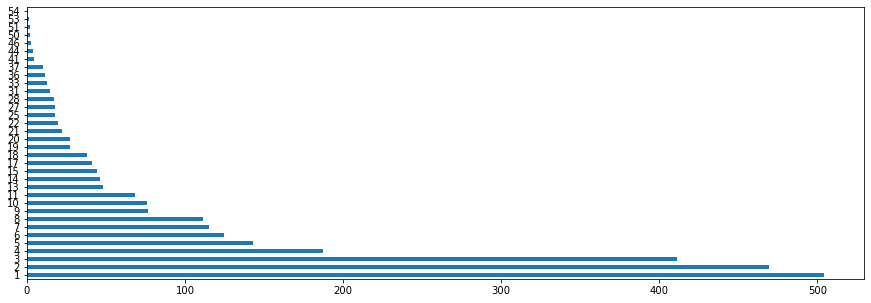

In [244]:
df_3["GDP"].astype(float).plot(kind="barh");

In [245]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  34 non-null     object
 1   GDP      34 non-null     object
 2   PCI      34 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [246]:
df_3["GDP"] = df_3["GDP"].astype(float)

C:\Users\kelvin\AppData\Local\Temp\ipykernel_2456\2518652009.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [247]:
df_3["PCI"] = df_3["PCI"].astype(float)

C:\Users\kelvin\AppData\Local\Temp\ipykernel_2456\2783146089.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

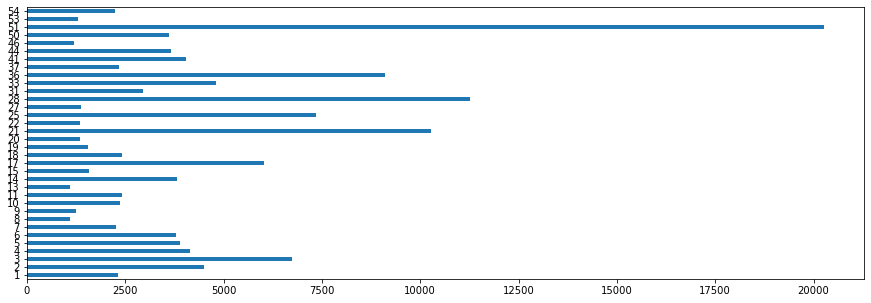

In [248]:
df_3["PCI"].astype(float).plot(kind="barh")

In [249]:
#df_3 = df_3["GDP"].astype(float)
#df_3 = df_3["PCI"].astype(float)

In [250]:
df_3["PCI"].mean()

4110.479294117648

In [251]:
df_3.groupby('Country')['PCI'].transform(lambda x: x.mean())

1      2326.230
2      4504.369
3      6738.926
4      4151.437
5      3896.214
6      3790.704
7      2255.480
8      1097.584
9      1245.040
10     2368.814
11     2418.436
13     1105.590
14     3815.820
15     1584.003
17     6025.680
18     2420.220
19     1558.144
20     1348.360
21    10281.775
22     1345.568
25     7347.738
27     1366.871
28    11264.416
31     2945.102
33     4808.922
36     9111.606
37     2328.251
41     4056.177
44     3665.827
46     1186.744
50     3600.223
51    20265.681
53     1299.682
54     2230.662
Name: PCI, dtype: float64

In [252]:
df_3["GDP"].corr(df_3["PCI"])

-0.05126474374224306

<AxesSubplot:>

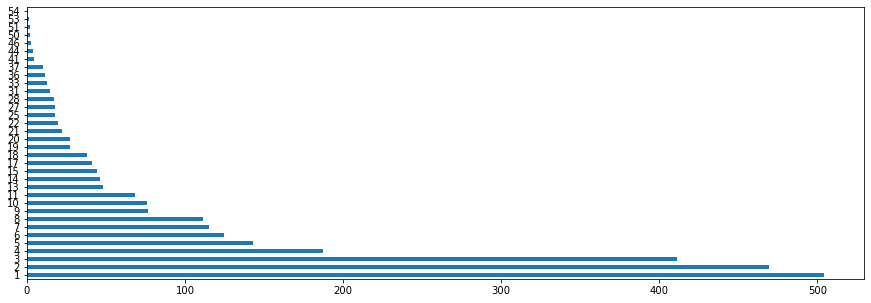

In [253]:
df_3["GDP"].sort_values(ascending= False).plot(kind="barh")

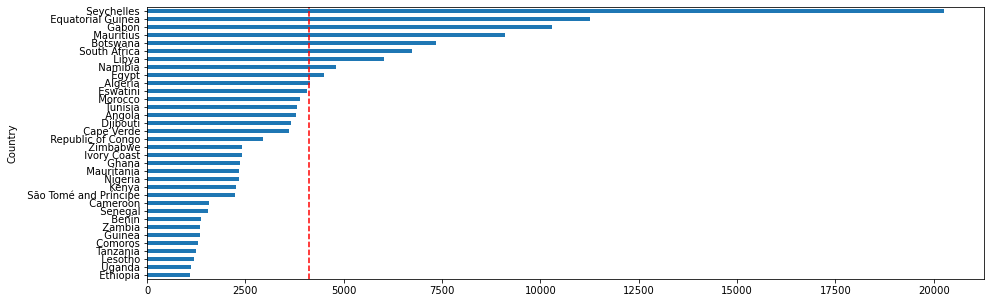

In [254]:
df_3.groupby('Country')['PCI'].sum().head(54).sort_values(ascending= True).plot(kind="barh")
plt.axvline(df_3['PCI'].mean(), color = "r", linestyle= "--");


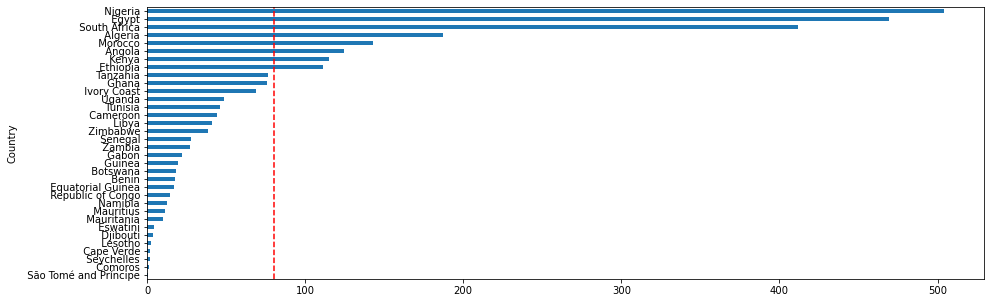

In [255]:
df_3.groupby('Country')['GDP'].sum().sort_values(ascending= True).plot(kind="barh")
plt.axvline(df_3['GDP'].mean(), color = "r", linestyle= "--");

In [256]:
age_cl_value_counts = df_3["GDP"].value_counts()
age_cl_value_counts

504.203    1
11.497     1
19.745     1
18.005     1
17.547     1
16.877     1
14.486     1
12.488     1
10.091     1
469.094    1
4.669      1
3.725      1
2.507      1
2.053      1
2.005      1
1.242      1
22.221     1
27.025     1
27.542     1
38.280     1
40.836     1
44.212     1
46.282     1
48.352     1
68.630     1
75.996     1
76.582     1
111.181    1
114.858    1
124.794    1
142.874    1
187.155    1
411.480    1
0.506      1
Name: GDP, dtype: int64

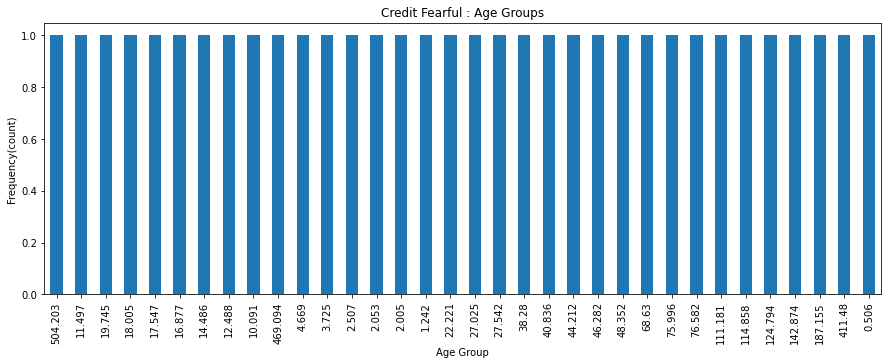

In [257]:
age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Frequency(count)",
    #title = "Credit Fearful:Age",
    title = "Credit Fearful : Age Groups"
    
);

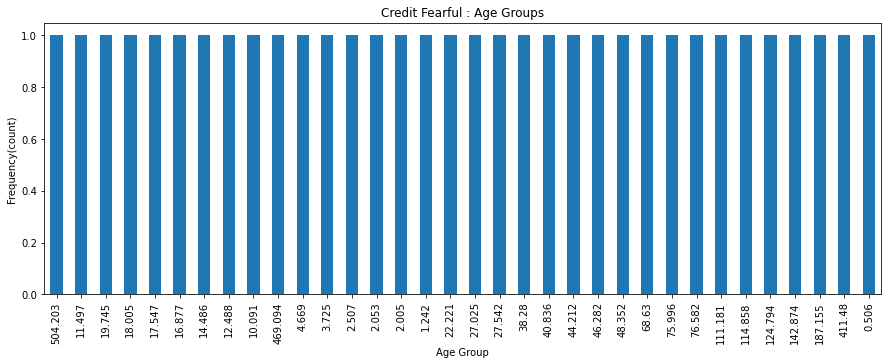

In [258]:
gdp = df_3["GDP"].value_counts()
gdp.plot(
    kind = "bar",
    xlabel = "Age Group",
    ylabel = "Frequency(count)",
    #title = "Credit Fearful:Age",
    title = "Credit Fearful : Age Groups"
    
);

In [259]:
dataf = gdp.to_frame()
type(dataf)

pandas.core.frame.DataFrame

In [260]:
df_educ = ( df_3["GDP"]
           .groupby(df_3["Country"])
           .value_counts(normalize =True)
           .rename("frequency")
           .to_frame()
           .reset_index()
          )
df_educ

,Country,GDP,frequency
0,Republic of Congo,14.486,1.0
1,Algeria,187.155,1.0
2,Angola,124.794,1.0
3,Benin,17.547,1.0
4,Botswana,18.005,1.0
5,Cameroon,44.212,1.0
6,Cape Verde,2.053,1.0
7,Comoros,1.242,1.0
8,Djibouti,3.725,1.0
9,Egypt,469.094,1.0


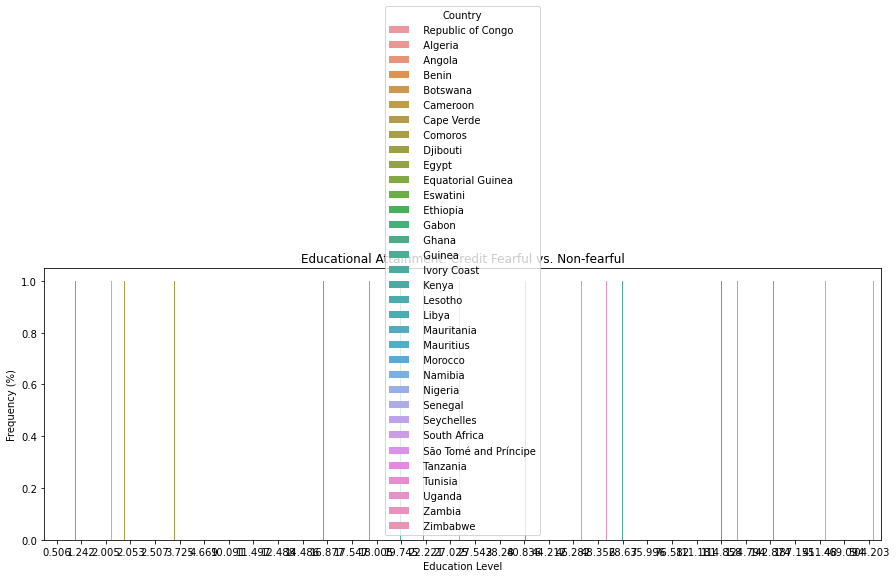

In [261]:
# Create bar chart of `df_educ`
sns.barplot( 
    x = "GDP",
    y = "frequency",
    hue= "Country",
    data = df_educ
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In [262]:
top_ten_var = df_3.var().sort_values().tail()
top_ten_var

C:\Users\kelvin\AppData\Local\Temp\ipykernel_2456\1345977685.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



GDP    1.674441e+04
PCI    1.513861e+07
dtype: float64

In [263]:
import plotly.express as px

In [264]:
# Create horizontal bar chart of `top_ten_var`
fig = px.bar(
    x =top_ten_var,
    y= top_ten_var.index
)

fig.show()

In [265]:
# Create a boxplot of `NHNFIN`
fig = px.box(data_frame = df_3,
            x = "Country",
             title = "Distribution of Non-home, Non-Financial Assets"
            )

fig.show()

In [266]:
df_3[["GDP","PCI"]].aggregate(["mean","std","max","min","count"]).astype(int)

,GDP,PCI
mean,79,4110
std,129,3890
max,504,20265
min,0,1097
count,34,34


In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
x = df_3[['GDP','PCI']]
ss = StandardScaler()
scaled_data =pd.DataFrame( ss.fit_transform(x), columns = x.columns)
scaled_data

,GDP,PCI
0,3.327747,-0.465474
1,3.052345,0.102758
2,2.600411,0.685707
3,0.840765,0.010685
4,0.493417,-0.055897
5,0.351594,-0.083423
6,0.273654,-0.483931
7,0.244811,-0.786002
8,-0.026590,-0.747533
9,-0.031187,-0.454364


In [269]:
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score

In [270]:
n_clusters = range(1,20)
inertial_errors = []
silhouette_scores = []

for k in n_clusters:
    model = make_pipeline(StandardScaler(),KMeans(n_clusters = k ,random_state = 42))
    model.fit(scaled_data)
    inertial_errors.append(model.named_steps["kmeans"].inertia_)
    #silhouette_scores.append( silhouette_score(scaled_data, model.named_steps["kmeans"].labels_ ) ) 

D:\Stats_software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [271]:
print(inertial_errors)

[68.00000000000001, 38.47712384576879, 14.782056586349919, 8.372513449788196, 5.309634852255486, 3.5777289683716655, 2.7501527463545994, 2.0177510336446334, 1.5006727559870878, 1.1492466468531868, 1.013073379496537, 0.8373790689379326, 0.7094680271027131, 0.6442468516312944, 0.5052086129594962, 0.4033878121437462, 0.3198910524922516, 0.26148552317665014, 0.21544612469778734]


In [272]:
silhouette_scores.append( silhouette_score(scaled_data, model.named_steps["kmeans"].labels_ ) ) 

In [273]:
print(silhouette_scores)

[0.313090020420286]


In [274]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x = n_clusters, y = inertial_errors, title = "K-Means: Inertia vs Number of clusters"
)
fig.update_layout(xaxis_title = "Number of Clusters(k)", yaxis_title = ("Inertia"))
fig.show()

# Create a line plot of `silhouette_scores` vs `n_clusters`
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x = n_clusters, y = silhouette_scores, title = "silhoutte_score vs Number of Clusters(k)"
)
fig.update_layout(xaxis_title = "Number of Clusters(k)", yaxis_title = ("silhoutte_score"))
fig.show()